In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [3]:
california = pd.read_parquet("datasets/reviews_parquet/california_reviews.parquet")
florida = pd.read_parquet("datasets/reviews_parquet/florida_reviews.parquet")
illinois = pd.read_parquet("datasets/reviews_parquet/illinois_reviews.parquet")
newyork = pd.read_parquet("datasets/reviews_parquet/nuevayork_reviews.parquet")
texas = pd.read_parquet("datasets/reviews_parquet/texas_reviews.parquet")
washington = pd.read_parquet("datasets/reviews_parquet/washington_reviews.parquet")

In [33]:
california["state"] = "California"
florida["state"] = "Florida"
illinois["state"] = "Illinois"
newyork["state"] = "New_York"
texas["state"] = "Texas"
washington["state"] = "Washington"

In [34]:
google_reviews = pd.concat([california,florida,illinois,newyork,texas,washington],axis=0)
google_reviews = google_reviews.reset_index(drop=True)

In [35]:
google_reviews

,name,time,rating,text,gmap_id,date,state
0,Song Ro,05:12:07,5,Love there korean rice cake.,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2021-01-06,California
1,Rafa Robles,05:47:28,5,Good very good,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2021-02-09,California
2,David Han,05:04:42,4,They make Korean traditional food very properly.,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2020-03-08,California
3,Anthony Kim,05:56:56,5,Short ribs are very delicious.,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2019-03-07,California
4,Mario Marzouk,05:01:41,5,Great food and prices the portions are large,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2017-05-16,California
...,...,...,...,...,...,...,...
14191627,Prasad G,19:44:51,5,Nice place to visit.,0x54905fc9357076eb:0xb98c4d55e9204118,2019-08-26,Washington
14191628,Preet Kamal Singh,15:59:53,5,Best pizza in town,0x54905fc9357076eb:0xb98c4d55e9204118,2019-10-08,Washington
14191629,jatt putt,05:37:30,5,Best pizza I love it,0x54905fc9357076eb:0xb98c4d55e9204118,2019-02-17,Washington
14191630,Frank Evans,10:22:36,5,Bam,0x54905fc9357076eb:0xb98c4d55e9204118,2019-08-30,Washington


In [37]:
google_reviews['date'] = pd.to_datetime(google_reviews['date'])
google_reviews['year'] = google_reviews['date'].dt.year

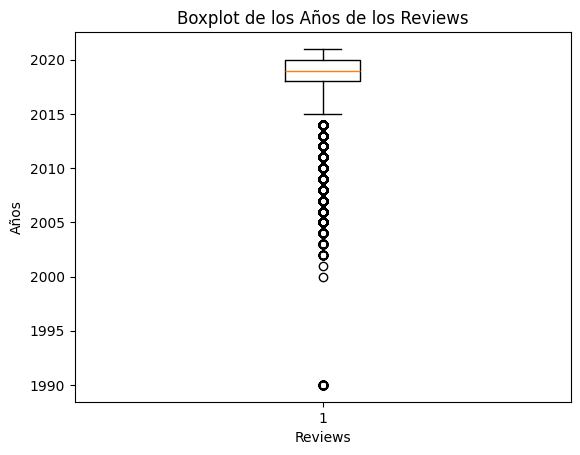

In [40]:
plt.boxplot(google_reviews['year'])
plt.title('Boxplot de los Años de los Reviews')
plt.ylabel('Años')
plt.xlabel('Reviews')
plt.show()

In [18]:
print(google_reviews['date'].dt.year.min())
print(google_reviews['date'].dt.year.max())

1990
2021


In [22]:
Q1 = google_reviews['date'].dt.year.quantile(0.25)
Q3 = google_reviews['date'].dt.year.quantile(0.75)
IQR = Q3 - Q1

# Determinar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los registros que son outliers en los años
outliers = google_reviews[(google_reviews['year'] < lower_bound) | (google_reviews['year'] > upper_bound)]


# Contar los registros por cada año outlier
outliers_count = outliers['year'].value_counts().reset_index()
outliers_count.columns = ['year', 'count']

# Mostrar el resultado
print(outliers_count)

    year  count
0   2014  48309
1   2013  34518
2   2012  19491
3   2011  15988
4   2010   5557
5   2009    768
6   2008    417
7   2007    251
8   2006    229
9   2005    207
10  2004     99
11  2003     52
12  1990     44
13  2002     26
14  2001      1
15  2000      1


### Interpretación de los Resultados

1. Distribución Temporal de Reviews:

* La mayor concentración de outliers se encuentra en los años más recientes (2014-2011), con un número considerable de reviews también en los años inmediatamente anteriores (2010-2005).
* La disminución significativa de reviews a medida que retrocedemos en el tiempo (2004 y anteriores) sugiere que la mayoría de los reviews se han acumulado en los últimos años.

2. Años Recientes con Alta Actividad:

* Los años con la mayor cantidad de reviews (2014 y 2013) indican una alta actividad de revisión en esos años, lo que puede correlacionarse con un aumento en la popularidad del uso de Google Maps y su función de reviews.
* Estos años también pueden reflejar un crecimiento de nuevos locales como restaurantes, ya que los consumidores comparten más activamente sus experiencias.

3. Años con Menos Reviews (2000-2007):

* La baja cantidad de reviews en estos años puede reflejar varias cosas:
    * Adopción Tardía de la Tecnología: En esos años, el uso de plataformas como Google Maps para reviews era menos común.
    * Disponibilidad de Datos: Es posible que Google Maps no tuviera una función robusta de reviews en esos años o que los datos disponibles se hayan registrado más tarde.
    * Revisión Retroactiva: Algunos reviews pueden haber sido añadidos retroactivamente a años más antiguos, lo que explicaría la presencia de reviews en esos años.

4. Años Muy Antiguos (Antes de 2000):

* Los pocos registros en años como 1990, 2001 y 2000 probablemente no sean significativos y podrían ser errores de entrada de datos, ya que la función de reviews de Google Maps no existía en esos momentos. Estos pueden representar registros anómalos o mal ingresados.

### Implicaciones para el Estudio de Mercado

1. Popularidad Reciente de la Revisión Online:

* La alta cantidad de reviews en los años más recientes (2011-2014) indica que la revisión en línea se ha vuelto cada vez más importante para los consumidores. Los inversores deben considerar la fuerte influencia de las reviews en línea en la reputación y el éxito de un restaurante.

2. Evolución del Comportamiento del Consumidor:

* El aumento progresivo en el número de reviews hasta 2014 sugiere que los consumidores están más dispuestos a compartir sus experiencias en línea. Esto puede ser una señal de que invertir en la presencia en línea y la gestión de la reputación es crucial para los nuevos negocios.

3. Oportunidades de Mercado en Nuevas Áreas:

* Si se observan patrones de reviews concentrados en ciertos años y áreas, esto podría indicar tendencias de crecimiento o declive en diferentes localidades. Los inversores pueden usar esta información para identificar áreas geográficas o periodos de tiempo con alta actividad de consumidores y ajustar sus estrategias en consecuencia.

4. Importancia de la Historia Reciente:

* La falta de reviews en años anteriores a 2000 y la baja actividad hasta 2007 destaca la importancia de los datos más recientes para tomar decisiones de inversión. Los inversores deberían centrarse más en las tendencias de los últimos años, ya que reflejan mejor el mercado actual.

5. Validación de Datos:

* La presencia de reviews en años improbables como 1990 sugiere la necesidad de una revisión de calidad de los datos. Asegurarse de que los datos de reviews son precisos y relevantes es esencial para un análisis fiable.

### Recomendaciones para los Inversores

1. Enfocarse en la Presencia en Línea:
* Los inversores deben asegurarse de que los nuevos restaurantes tengan una fuerte presencia en línea y gestionen activamente sus reviews, dado el aumento de la importancia de las reviews de Google Maps en la última década.

2. Analizar Tendencias Recientes:
* Las tendencias de los últimos 5-10 años son las más relevantes para entender el comportamiento del consumidor y la competitividad en el mercado. Esto puede guiar decisiones sobre la ubicación, tipo de cocina y estrategias de marketing.

3. Explorar Oportunidades en Áreas con Alta Actividad:
* Identificar áreas geográficas con un alto número de reviews recientes puede ayudar a localizar mercados potencialmente lucrativos o áreas en expansión.

4. Gestionar la Reputación:
* La reputación en línea es fundamental. Invertir en servicios de gestión de reputación y en la calidad de la experiencia del cliente puede ser una estrategia clave para atraer y retener clientes.

### Conclusión
El análisis de outliers en los años de los reviews proporciona una visión profunda sobre cómo los patrones de revisión han evolucionado con el tiempo y cómo esto puede influir en las decisiones de inversión en el sector de la restauración. Al enfocarse en las tendencias recientes y la gestión activa de la reputación en línea, los inversores pueden maximizar sus oportunidades en el mercado competitivo de restaurantes en EE.UU.

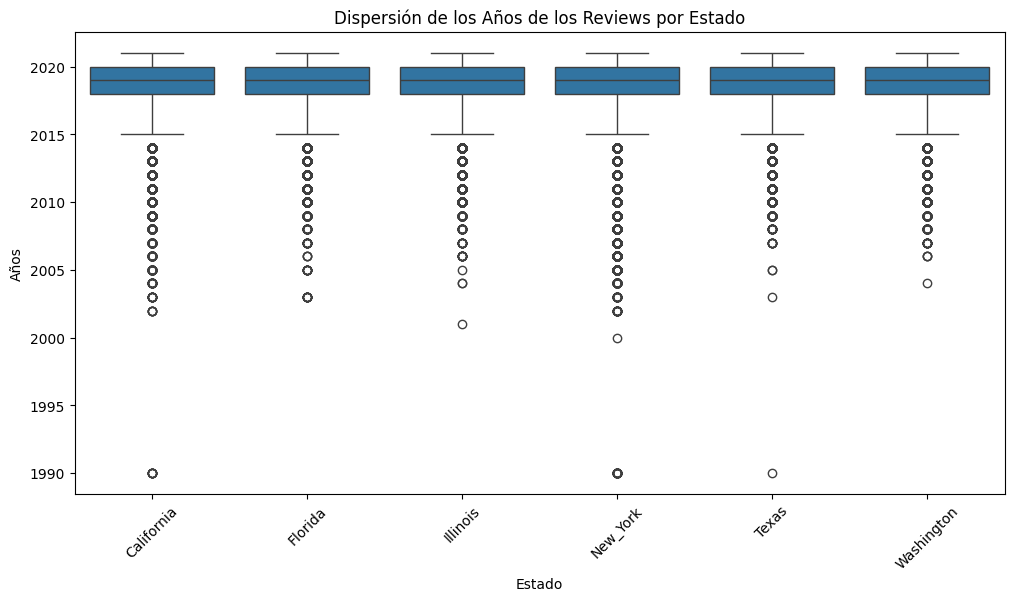

In [42]:
# Crear el boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='state', y='year', data=google_reviews)

# Ajustar el título y las etiquetas
plt.title('Dispersión de los Años de los Reviews por Estado')
plt.xlabel('Estado')
plt.ylabel('Años')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

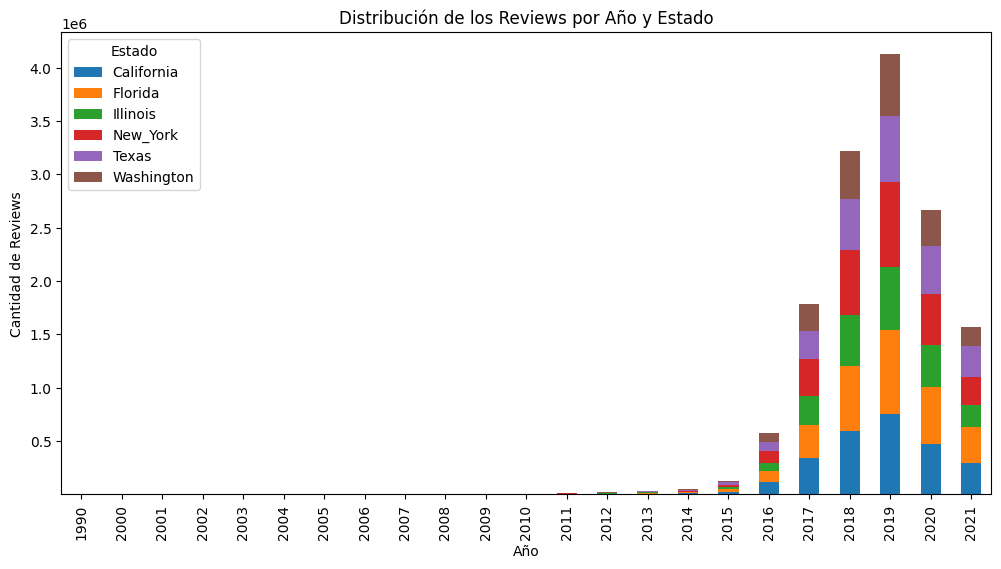

In [43]:
reviews_per_year_state = google_reviews.groupby(['year', 'state']).size().unstack().fillna(0)

# Crear el histograma apilado
reviews_per_year_state.plot(kind='bar', stacked=True, figsize=(12, 6))

# Ajustar el título y las etiquetas
plt.title('Distribución de los Reviews por Año y Estado')
plt.xlabel('Año')
plt.ylabel('Cantidad de Reviews')
plt.legend(title='Estado')

# Mostrar el gráfico
plt.show()

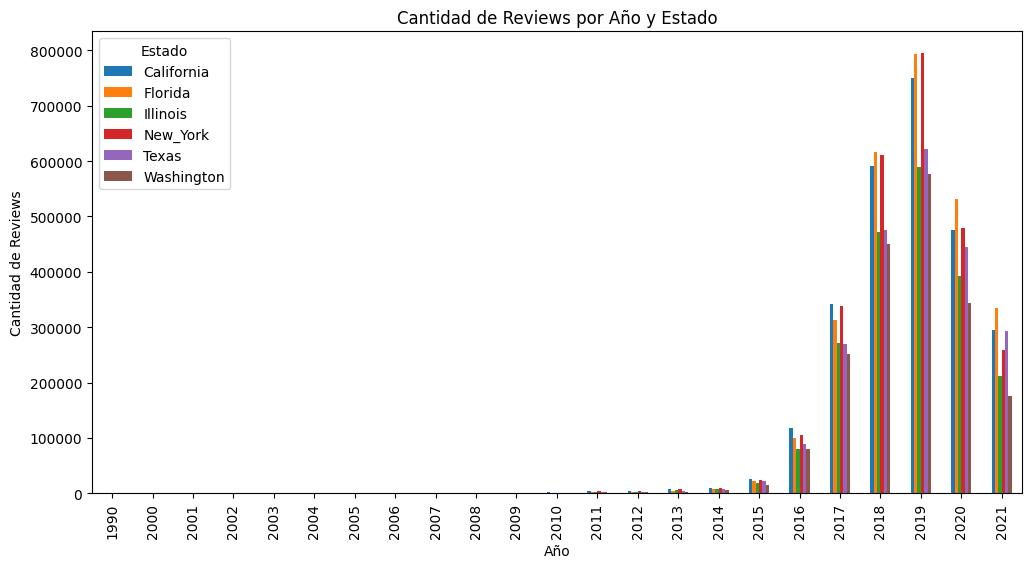

In [44]:
reviews_per_year_state = google_reviews.groupby(['year', 'state']).size().unstack().fillna(0)

# Crear el gráfico de barras
reviews_per_year_state.plot(kind='bar', figsize=(12, 6))

# Ajustar el título y las etiquetas
plt.title('Cantidad de Reviews por Año y Estado')
plt.xlabel('Año')
plt.ylabel('Cantidad de Reviews')
plt.legend(title='Estado')

# Mostrar el gráfico
plt.show()

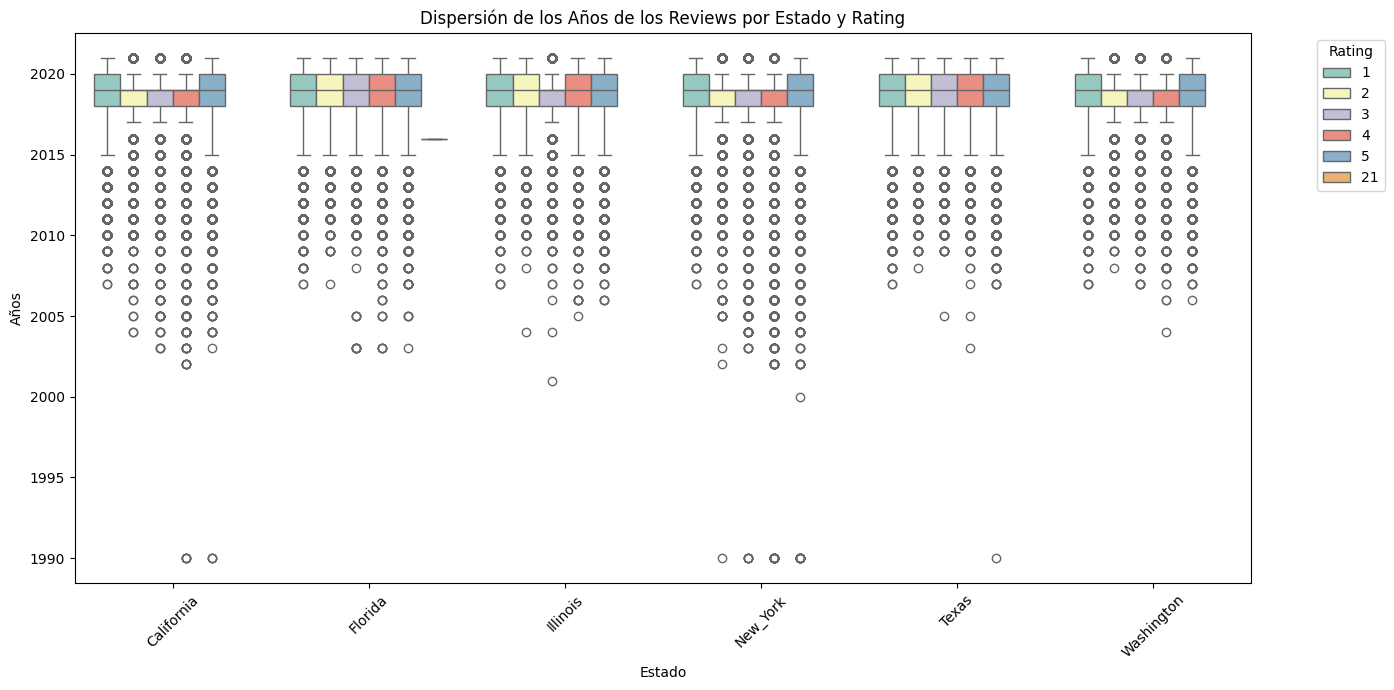

In [46]:
# Crear el boxplot
plt.figure(figsize=(14, 7))
sns.boxplot(x='state', y='year', hue='rating', data=google_reviews, palette='Set3')

# Ajustar el título y las etiquetas
plt.title('Dispersión de los Años de los Reviews por Estado y Rating')
plt.xlabel('Estado')
plt.ylabel('Años')
plt.xticks(rotation=45)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [50]:
# Agrupar por estado para contar el número de reviews y calcular el promedio de rating
state_summary = google_reviews.groupby('state').agg(
    review_count=('state', 'size'),
    average_rating=('rating', 'mean')
).reset_index()

# Ordenar por el número de reviews
state_summary = state_summary.sort_values(by='review_count', ascending=False)

# Mostrar el resumen
print(state_summary)

        state  review_count  average_rating
1     Florida       2730604        4.315401
3    New_York       2640663        4.303740
0  California       2624757        4.314976
4       Texas       2235440        4.271316
2    Illinois       2053740        4.314209
5  Washington       1906428        4.339244


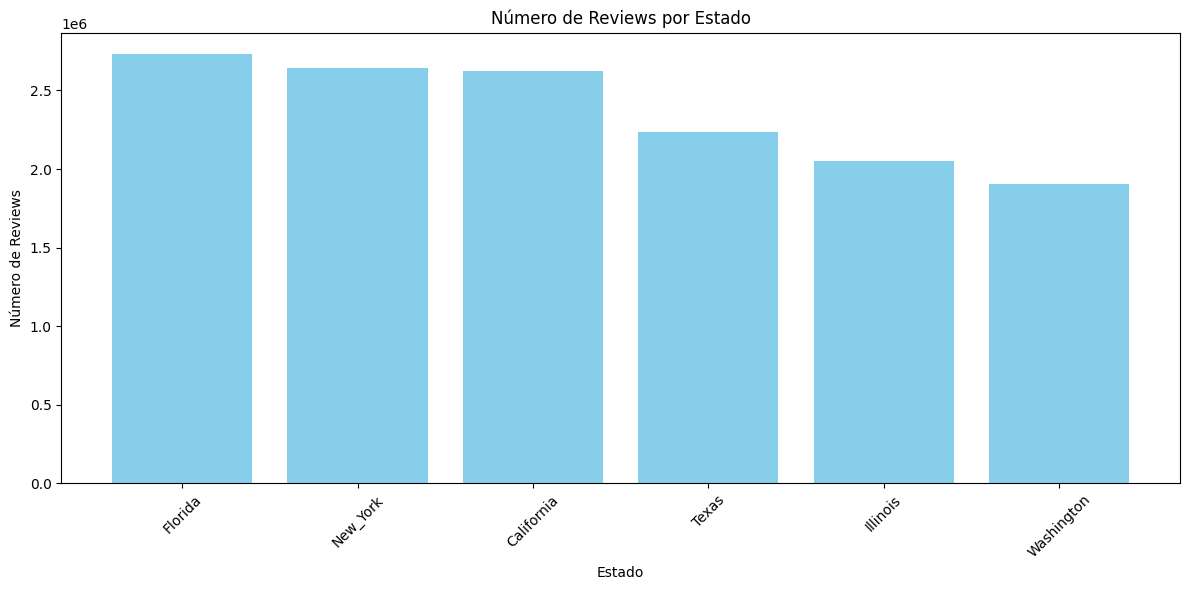

In [51]:
# Crear el gráfico de barras para el número de reviews por estado
plt.figure(figsize=(12, 6))
plt.bar(state_summary['state'], state_summary['review_count'], color='skyblue')
plt.xlabel('Estado')
plt.ylabel('Número de Reviews')
plt.title('Número de Reviews por Estado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

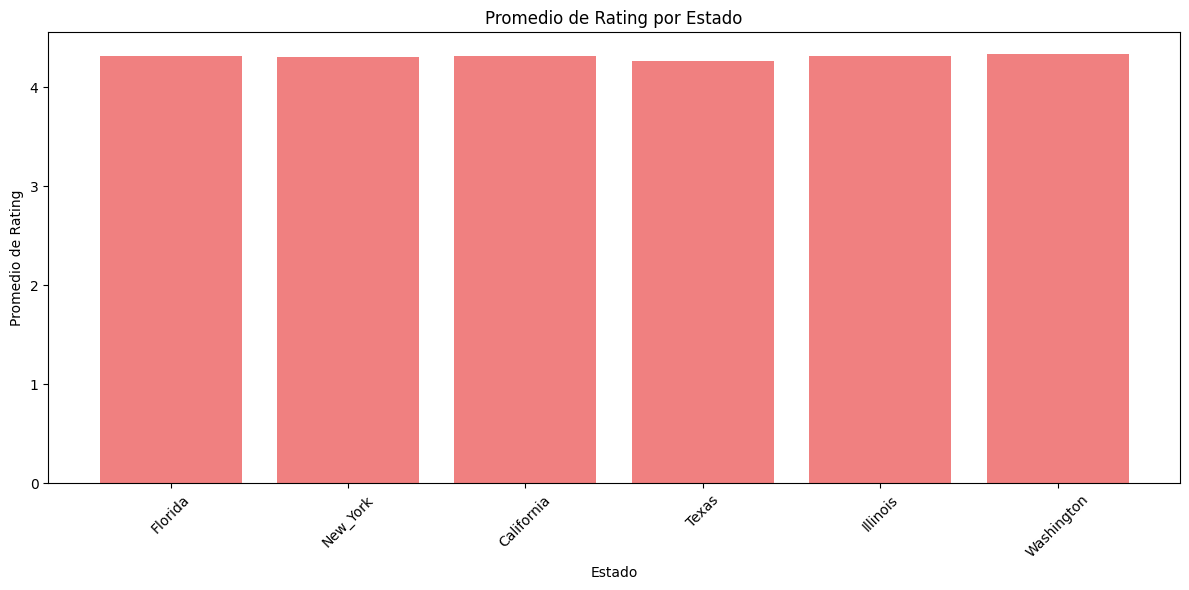

In [52]:
# Crear el gráfico de barras para el promedio de rating por estado
plt.figure(figsize=(12, 6))
plt.bar(state_summary['state'], state_summary['average_rating'], color='lightcoral')
plt.xlabel('Estado')
plt.ylabel('Promedio de Rating')
plt.title('Promedio de Rating por Estado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<br><br>

### GOOGLE LOCALS (METADATA)
<br><br>

In [57]:
google_locals = pd.read_parquet("datasets/metadata_parquet/google_locals.parquet")

In [55]:
google_locals

,name,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,hours,MISC,relative_results
0,San Soo Dang,0x80c2c778e3b73d33:0xbdc58662a4a97d49,34.058092,-118.292130,[Korean restaurant],4.4,18,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...",{'Accessibility': ['Wheelchair accessible entr...,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2..."
1,Nobel Textile Co,0x80c2c632f933b073:0xc31785961fe826a6,34.036694,-118.249421,[Fabric store],4.3,7,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Accessibility': None, 'Activities': None, 'A...","[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2..."
2,Matrix International Textiles,0x80c2cf163db6bc89:0x219484e2edbcfa41,34.015505,-118.181839,[Fabric store],3.5,6,"[[Thursday, 8:30AM–5:30PM], [Friday, 8:30AM–5:...",{'Accessibility': ['Wheelchair accessible entr...,"[0x80c2cf042a5d9561:0xd0024ad6f81f1335, 0x80c2..."
3,Vons Chicken,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,33.916402,-118.010855,[Restaurant],4.5,18,"[[Thursday, 11AM–9:30PM], [Friday, 11AM–9:30PM...",{'Accessibility': ['Wheelchair accessible entr...,None
4,Black Tie Ski Rental Delivery of Mammoth,0x80960c29f2e3bf29:0x4b291f0d275a5699,37.638754,-118.966055,"[Ski rental service, Snowboard rental service]",5.0,34,"[[Thursday, 8AM–5PM], [Friday, 8AM–5PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...,"[0x80960dcd6ba76731:0x9a6875ced2f9228e, 0x8096..."
...,...,...,...,...,...,...,...,...,...,...
351180,Hoquiam Licensing & Transportation Agency,0x54923990302cb3c7:0x10f023b56efdb019,46.976293,-123.850030,"[Driver and vehicle licensing agency, Local go...",4.3,94,"[[Monday, 9AM–5PM], [Tuesday, 9AM–5PM], [Wedne...",{'Accessibility': ['Wheelchair accessible entr...,"[0x54923a1916beb1bd:0xa22ad32d9bf33f71, 0x5492..."
351181,Dead Center Cycles,0x54906ab43fffffff:0x69acbd12df532b6c,47.075371,-122.745728,[Motorcycle parts store],4.7,25,"[[Monday, Closed], [Tuesday, 9AM–5:30PM], [Wed...",{'Accessibility': ['Wheelchair accessible entr...,"[0x5490ff51d12aa0ed:0x4b1b12c391a0768c, 0x5491..."
351182,DAVIDsTEA,0x880e4c68f4f40b25:0xebf7d3e5e5e0f2d,41.852117,-87.951910,"[Tea store, Beverage distributor]",4.4,108,None,{'Accessibility': ['Wheelchair accessible entr...,"[0x880e34dd6f901fc3:0x67207eade388d58d, 0x880e..."
351183,"Premier Physicians: Srinivas Kota, MD, FMNM, A...",0x880e592f2fbe2c83:0xac093ec968d718e9,41.673721,-88.123725,"[Internist, Doctor, Medical spa]",4.5,108,"[[Monday, 8AM–6PM], [Tuesday, 8AM–5PM], [Wedne...",{'Accessibility': ['Wheelchair accessible entr...,"[0x880e592ba842a983:0xb13ca4b232c4f574, 0x880e..."


In [56]:
# Eliminar los corchetes y espacios adicionales
google_locals['category'] = google_locals['category'].str.replace(r'[\[\]]', '', regex=True)
google_locals

,name,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,hours,MISC,relative_results
0,San Soo Dang,0x80c2c778e3b73d33:0xbdc58662a4a97d49,34.058092,-118.292130,NaN,4.4,18,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...",{'Accessibility': ['Wheelchair accessible entr...,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2..."
1,Nobel Textile Co,0x80c2c632f933b073:0xc31785961fe826a6,34.036694,-118.249421,NaN,4.3,7,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Accessibility': None, 'Activities': None, 'A...","[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2..."
2,Matrix International Textiles,0x80c2cf163db6bc89:0x219484e2edbcfa41,34.015505,-118.181839,NaN,3.5,6,"[[Thursday, 8:30AM–5:30PM], [Friday, 8:30AM–5:...",{'Accessibility': ['Wheelchair accessible entr...,"[0x80c2cf042a5d9561:0xd0024ad6f81f1335, 0x80c2..."
3,Vons Chicken,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,33.916402,-118.010855,NaN,4.5,18,"[[Thursday, 11AM–9:30PM], [Friday, 11AM–9:30PM...",{'Accessibility': ['Wheelchair accessible entr...,None
4,Black Tie Ski Rental Delivery of Mammoth,0x80960c29f2e3bf29:0x4b291f0d275a5699,37.638754,-118.966055,NaN,5.0,34,"[[Thursday, 8AM–5PM], [Friday, 8AM–5PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...,"[0x80960dcd6ba76731:0x9a6875ced2f9228e, 0x8096..."
...,...,...,...,...,...,...,...,...,...,...
351180,Hoquiam Licensing & Transportation Agency,0x54923990302cb3c7:0x10f023b56efdb019,46.976293,-123.850030,NaN,4.3,94,"[[Monday, 9AM–5PM], [Tuesday, 9AM–5PM], [Wedne...",{'Accessibility': ['Wheelchair accessible entr...,"[0x54923a1916beb1bd:0xa22ad32d9bf33f71, 0x5492..."
351181,Dead Center Cycles,0x54906ab43fffffff:0x69acbd12df532b6c,47.075371,-122.745728,NaN,4.7,25,"[[Monday, Closed], [Tuesday, 9AM–5:30PM], [Wed...",{'Accessibility': ['Wheelchair accessible entr...,"[0x5490ff51d12aa0ed:0x4b1b12c391a0768c, 0x5491..."
351182,DAVIDsTEA,0x880e4c68f4f40b25:0xebf7d3e5e5e0f2d,41.852117,-87.951910,NaN,4.4,108,None,{'Accessibility': ['Wheelchair accessible entr...,"[0x880e34dd6f901fc3:0x67207eade388d58d, 0x880e..."
351183,"Premier Physicians: Srinivas Kota, MD, FMNM, A...",0x880e592f2fbe2c83:0xac093ec968d718e9,41.673721,-88.123725,NaN,4.5,108,"[[Monday, 8AM–6PM], [Tuesday, 8AM–5PM], [Wedne...",{'Accessibility': ['Wheelchair accessible entr...,"[0x880e592ba842a983:0xb13ca4b232c4f574, 0x880e..."


In [ ]:


# Separar las listas en elementos individuales
all_categories = google_locals['category'].str.split(', ').explode()

# Mostrar el resultado
print(all_categories.head(10))